In [1]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [3]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


k-means

In [6]:
pdf = df.drop('Gender', axis=1)
pdf.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [8]:
from sklearn.preprocessing import StandardScaler
X = pdf.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [10]:
pdf.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


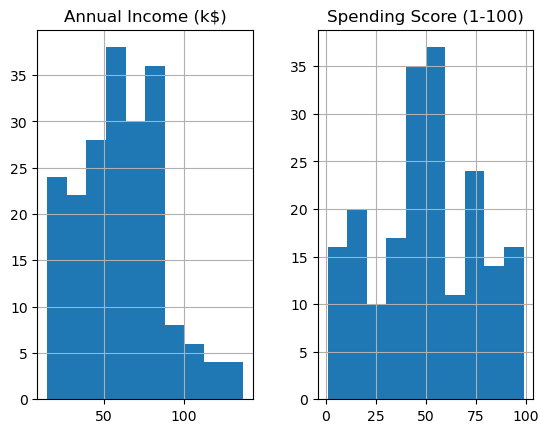

In [12]:
viz = pdf[['Annual Income (k$)','Spending Score (1-100)']]
viz.hist()
plt.show()

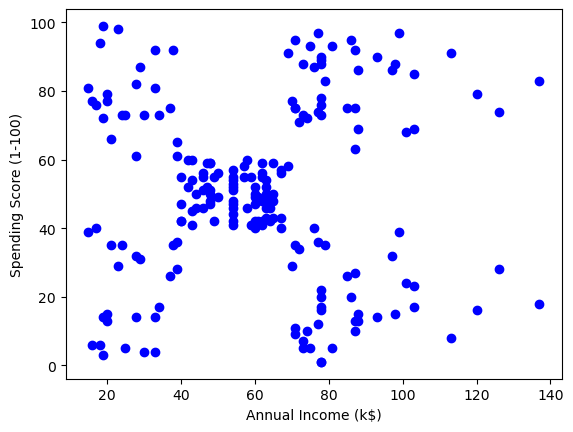

In [14]:
plt.scatter(pdf['Annual Income (k$)'], pdf['Spending Score (1-100)'], color='blue')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [109]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 20)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

C:\Users\BagherSaedi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 2 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 4 1 2 1 2 1 4 1 1 1 4 1 1 4 4 4 4 4 1 4 4 1 4 4 4 1 4 4 1 1 4 4 4 4
 4 1 4 4 1 4 4 1 4 4 1 4 4 1 1 4 4 1 4 4 1 1 4 1 4 1 1 4 4 1 4 1 4 4 4 4 4
 1 0 1 1 1 4 4 4 4 1 0 3 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 4 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [110]:
pdf["Clus_km"] = labels
pdf.head(5)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clus_km,Clus_Db
0,1,19,15,39,1,-1
1,2,21,15,81,1,-1
2,3,20,16,6,2,-1
3,4,23,16,77,1,-1
4,5,31,17,40,1,-1


In [113]:
pdf.groupby('Clus_km').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clus_Db
Clus_km,,,,,
0,159.743590,39.871795,86.102564,19.358974,-1.0
1,55.648148,25.185185,41.092593,62.240741,-1.0
2,24.100000,46.250000,26.750000,18.350000,-1.0
3,161.025000,32.875000,86.100000,81.525000,-1.0
4,83.872340,55.638298,54.382979,48.851064,-1.0


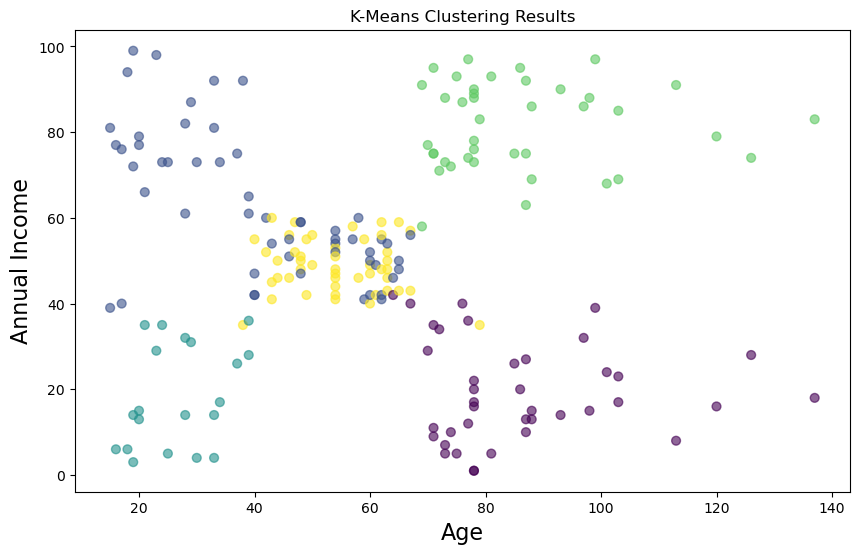

In [115]:
plt.figure(figsize=(10, 6))
area = np.pi * (X[:, 1])**2  
plt.scatter(X[:, 1], X[:, 2], s=40, c=labels.astype(float), alpha=.6)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Annual Income', fontsize=16)
plt.title('K-Means Clustering Results')
plt.show()

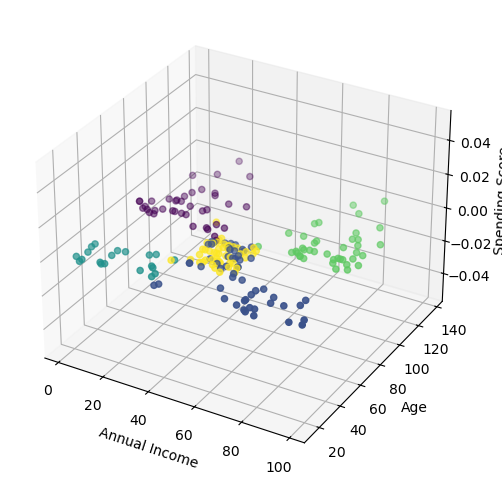

In [117]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Annual Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score')


ax.scatter(X[:, 2], X[:, 1], c=labels.astype(float))

plt.show()


Hierarchical

In [27]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
%matplotlib inline

In [29]:
featureset = df[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [31]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918]])

In [33]:
import scipy
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

array([[0.        , 0.43029381, 0.33738296, ..., 1.00888686, 1.0528145 ,
        1.11639204],
       [0.43029381, 0.        , 0.76559158, ..., 0.93683095, 1.20748243,
        1.01507247],
       [0.33738296, 0.76559158, 0.        , ..., 1.16089362, 1.02563246,
        1.27984489],
       ...,
       [1.00888686, 0.93683095, 1.16089362, ..., 0.        , 0.57849818,
        0.13432353],
       [1.0528145 , 1.20748243, 1.02563246, ..., 0.57849818, 0.        ,
        0.66437953],
       [1.11639204, 1.01507247, 1.27984489, ..., 0.13432353, 0.66437953,
        0.        ]])

In [35]:
import numpy as np
import scipy.cluster.hierarchy as hierarchy
from scipy.spatial.distance import squareform
condensed_D = squareform(D)

Z = hierarchy.linkage(condensed_D, method='complete')


In [37]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [39]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 5, 4,
       3, 4, 3, 4, 3, 5, 3, 4, 3, 5, 3, 4, 3, 4, 3, 4, 3, 5, 3, 4, 3, 5,
       3, 5, 3, 5, 5, 5, 3, 5, 5, 3, 3, 3, 3, 3, 5, 3, 3, 5, 3, 3, 3, 5,
       5, 3, 5, 5, 3, 3, 3, 3, 3, 5, 5, 5, 5, 3, 3, 5, 3, 3, 5, 3, 3, 5,
       5, 3, 3, 5, 3, 5, 5, 5, 3, 5, 3, 5, 5, 3, 3, 5, 3, 5, 3, 3, 3, 3,
       3, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 5, 1, 5, 1, 3, 1, 3, 1, 3, 1,
       5, 1, 2, 1, 3, 1, 2, 1, 3, 1, 5, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 2, 1, 2, 1, 2, 1, 3, 1,
       3, 1, 3, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

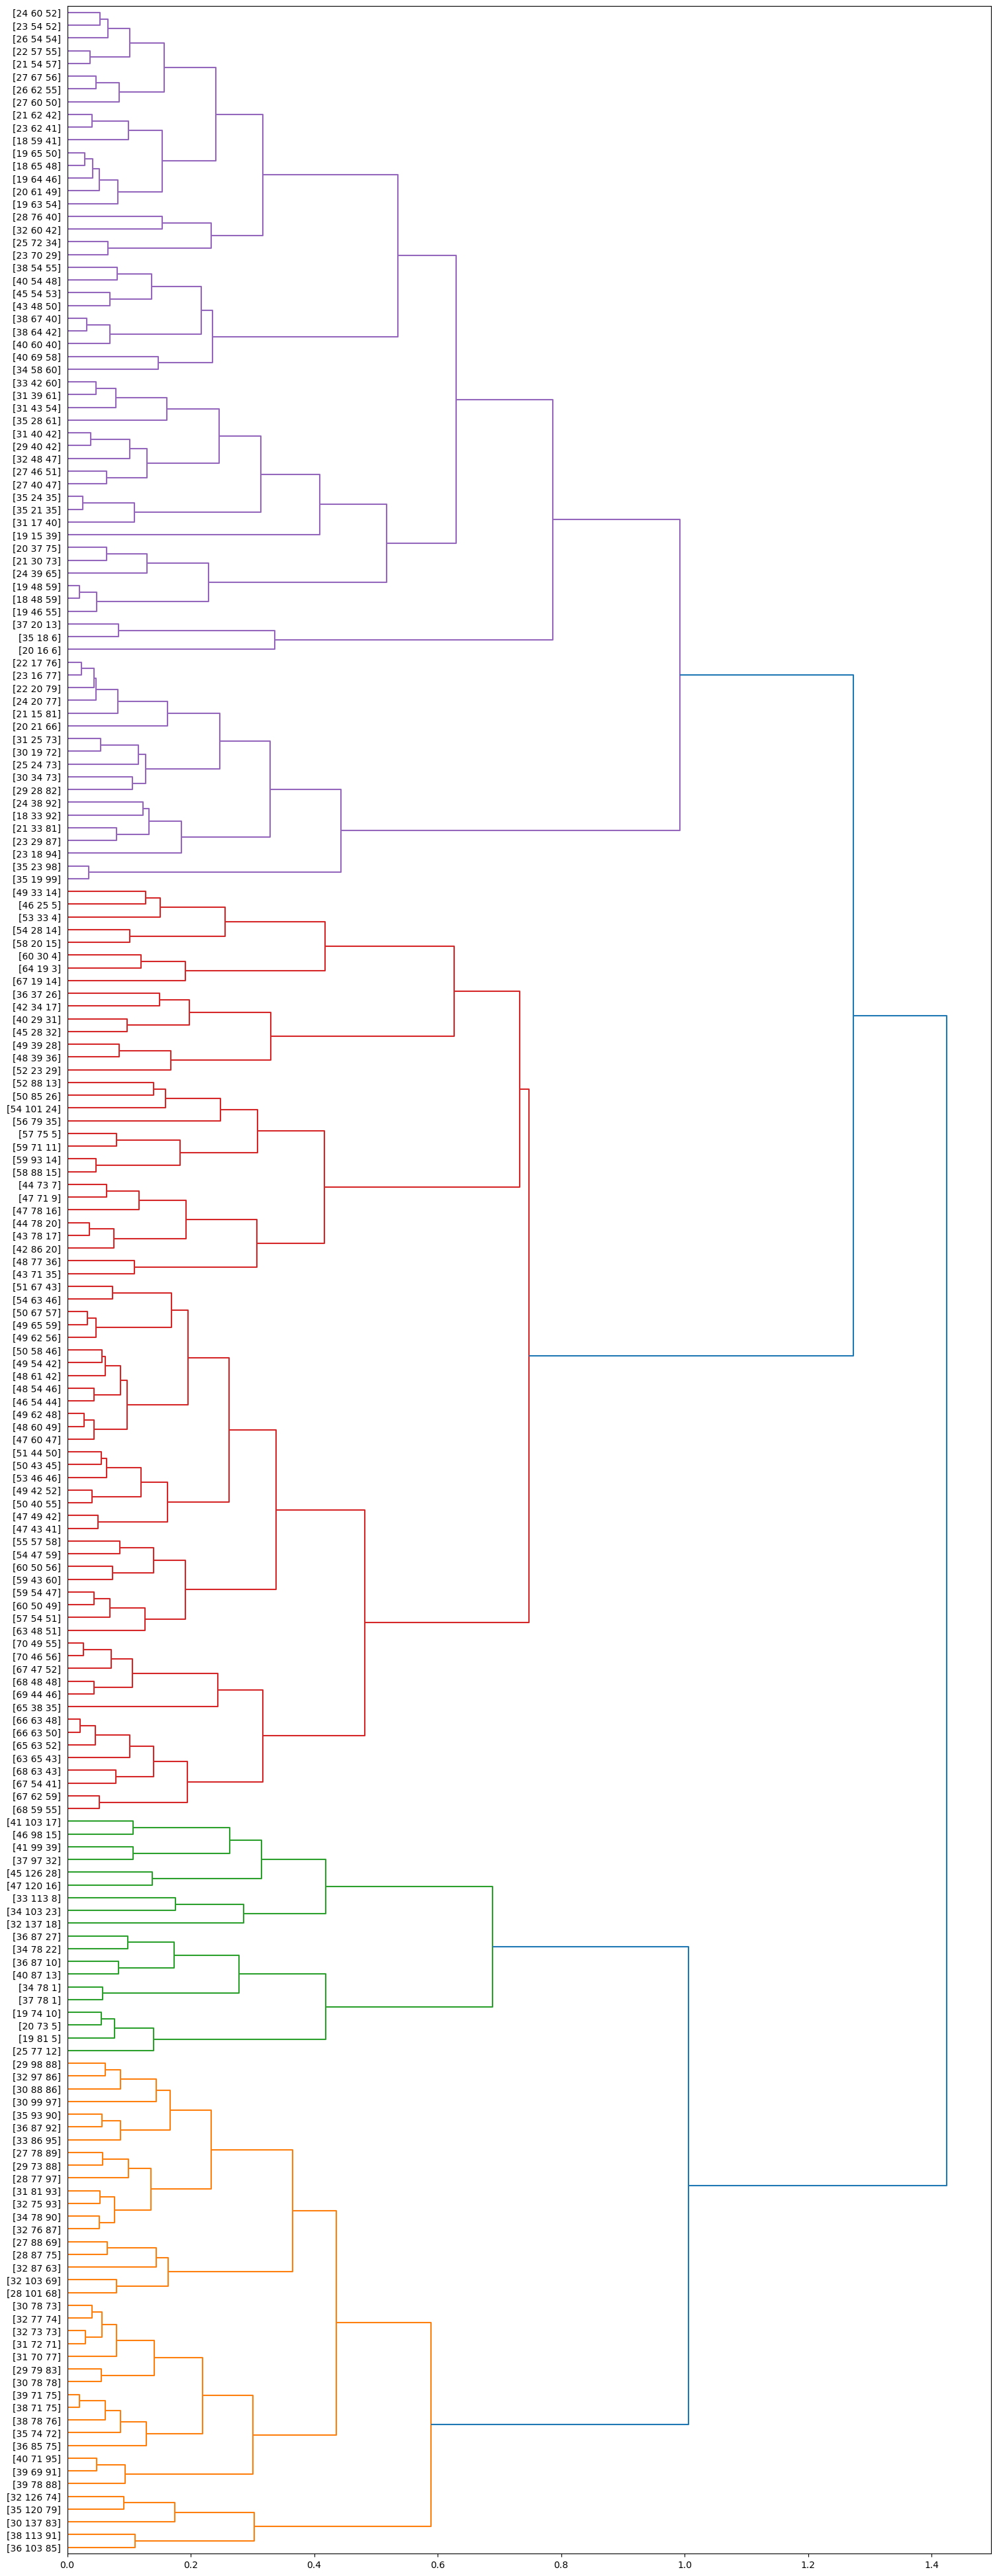

In [41]:
fig = plt.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['Age'][id], pdf['Annual Income (k$)'][id],pdf['Spending Score (1-100)'][id] )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =10, orientation = 'right')

DBSCAN

In [43]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [46]:
set(labels)

{-1}